<a href="https://colab.research.google.com/github/chandrakiranck/fuzzy-adventure/blob/master/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve
lg=LogisticRegression(solver="liblinear")
import warnings 
warnings.filterwarnings("ignore")

## **READ THE DATA and EDA PART**

In [0]:
data=pd.read_csv("/content/drive/My Drive/casestudy datasets/credit-card-default.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID           30000 non-null int64
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
defaulted    30000 non-null int64
dtypes: int64(25)
memory usage: 5.7 MB


0    0.7788
1    0.2212
Name: defaulted, dtype: float64


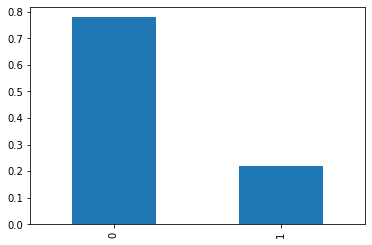

In [0]:
print(data.defaulted.value_counts(normalize=True))
data.defaulted.value_counts(normalize=True).plot.bar()

2    0.603733
1    0.396267
Name: SEX, dtype: float64


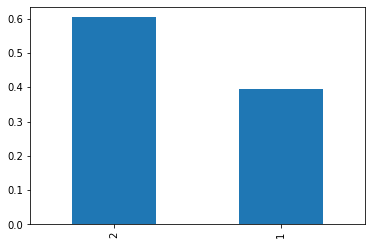

In [0]:
print(data.SEX.value_counts(normalize=True))
data.SEX.value_counts(normalize=True).plot.bar()

2    0.467667
1    0.352833
3    0.163900
5    0.009333
4    0.004100
6    0.001700
0    0.000467
Name: EDUCATION, dtype: float64


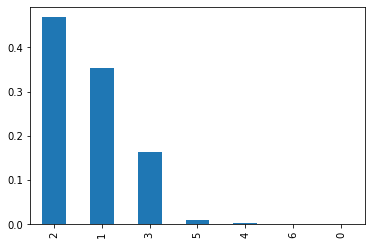

In [0]:
print(data.EDUCATION.value_counts(normalize=True))
data.EDUCATION.value_counts(normalize=True).plot.bar()

In [0]:
data.EDUCATION=data.EDUCATION.replace({5:3,6:3,4:3,0:3})

In [0]:
data.MARRIAGE=data.MARRIAGE.replace({0:2,3:2})

2    0.5447
1    0.4553
Name: MARRIAGE, dtype: float64


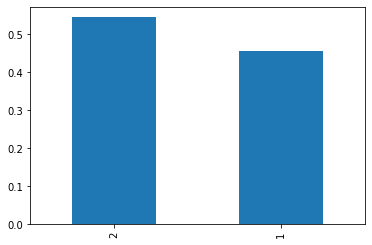

In [0]:
print(data.MARRIAGE.value_counts(normalize=True))
data.MARRIAGE.value_counts(normalize=True).plot.bar()

In [0]:
print(data["LIMIT_BAL"].describe())


count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64


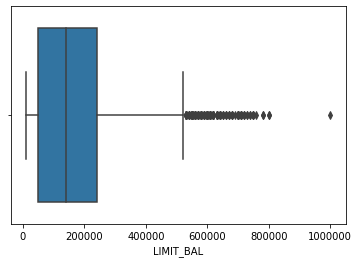

In [0]:
sns.boxplot(data["LIMIT_BAL"])

In [0]:
q1=data["LIMIT_BAL"].quantile(0.25)
q2=data["LIMIT_BAL"].quantile(0.5)
q3=data["LIMIT_BAL"].quantile(0.75)
iqr=q3-q1
print("q1",q1)
print("q2",q2)
print("q3",q3)
data=data[~(data["LIMIT_BAL"]>(q3+1.5*iqr))]

q1 50000.0
q2 140000.0
q3 240000.0


In [0]:
data["LIMIT_BAL"].describe()

count     29833.000000
mean     164963.284953
std      125529.099652
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      520000.000000
Name: LIMIT_BAL, dtype: float64

In [0]:
data["AGE"].describe()

count    29833.000000
mean        35.463983
std          9.218344
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

## **CATEGORICAL VARIABLES**

In [0]:
data=data.drop(["ID"],axis=1)
cat_cols=["SEX","EDUCATION","MARRIAGE"]
data=pd.get_dummies(data,columns=cat_cols,drop_first=True)

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29833 entries, 0 to 29999
Data columns (total 25 columns):
LIMIT_BAL      29833 non-null int64
AGE            29833 non-null int64
PAY_0          29833 non-null int64
PAY_2          29833 non-null int64
PAY_3          29833 non-null int64
PAY_4          29833 non-null int64
PAY_5          29833 non-null int64
PAY_6          29833 non-null int64
BILL_AMT1      29833 non-null int64
BILL_AMT2      29833 non-null int64
BILL_AMT3      29833 non-null int64
BILL_AMT4      29833 non-null int64
BILL_AMT5      29833 non-null int64
BILL_AMT6      29833 non-null int64
PAY_AMT1       29833 non-null int64
PAY_AMT2       29833 non-null int64
PAY_AMT3       29833 non-null int64
PAY_AMT4       29833 non-null int64
PAY_AMT5       29833 non-null int64
PAY_AMT6       29833 non-null int64
defaulted      29833 non-null int64
SEX_2          29833 non-null uint8
EDUCATION_2    29833 non-null uint8
EDUCATION_3    29833 non-null uint8
MARRIAGE_2     29833 non-nu

In [0]:
y=data["defaulted"]
X=data.drop(["defaulted","BILL_AMT4","BILL_AMT5","BILL_AMT2","BILL_AMT6",'PAY_6',"PAY_4"],axis=1)


## **LOGISTIC APPROACH - STATISCAL APPROACH**

In [0]:
from statsmodels.tools import add_constant 
x_constant=add_constant(X)
x_constant.head()
model=sm.Logit(y,x_constant,maxiter=1000)
result=model.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.465384
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              defaulted   No. Observations:                29833
Model:                          Logit   Df Residuals:                    29814
Method:                           MLE   Df Model:                           18
Date:                Tue, 12 Nov 2019   Pseudo R-squ.:                  0.1206
Time:                        05:03:15   Log-Likelihood:                -13884.
converged:                       True   LL-Null:                       -15787.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.0050      0.086    -11.707      0.000      -1.173      -0.837
LIMIT_BAL   -7.026e-07    1.6e-07     -4.387      0.000   -1.02e-06   -3.89e-07
AGE             0.0063      0.002      3.427      0.001       0.003       0.010
PAY_0           0.5790      0.018     32.778      0.000       0.544       0.614
PAY_2           0.0831      0.020      4.120      0.000       0.044       0.123
PAY_3           0.0849      0.020      4.176      0.000       0.045       0.125
PAY_5           0.0558      0.018      3.149      0.002       0.021       0.091
BILL_AMT1   -4.387e-06   7.41e-07     -5.920      0.000   -5.84e-06   -2.93e-06
BILL_AMT3     3.06e-06   8.15e-07      3.755      0.000    1.46e-06    4.66e-06
PAY_AMT1    -1.217e-05   2.09e-06     -5.826      0.000   -1.63e-05   -8.07e-06
PAY_AMT2    -1.107e-05      2e-06     -5.543      0.000    -1.5e-05   -7.16e-06
PAY_AMT3    -2.829e-06   1.56e-06     -1.812      0.070   -5.89e-06    2.32e-07
PAY_AMT4    -3.003e-06   1.54e-06     -1.952      0.051   -6.02e-06    1.21e-08
PAY_AMT5    -3.473e-06   1.55e-06     -2.238      0.025   -6.52e-06   -4.32e-07
PAY_AMT6    -2.537e-06   1.31e-06     -1.940      0.052    -5.1e-06    2.55e-08
SEX_2          -0.1142      0.031     -3.715      0.000      -0.174      -0.054
EDUCATION_2    -0.0904      0.036     -2.536      0.011      -0.160      -0.021
EDUCATION_3    -0.1761      0.047     -3.768      0.000      -0.268      -0.085
MARRIAGE_2     -0.1833      0.034     -5.366      0.000      -0.250      -0.116
===============================================================================
"""

if age of the person incearse by one yr the default increases



In sex_2 compare to sex_1 are less defaulters







In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = [variance_inflation_factor(x_constant.values, i) for i in range(x_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
LIMIT_BAL,1.543724
AGE,1.351973
PAY_0,1.908881
PAY_2,3.165988
PAY_3,3.026426
PAY_5,2.075043
BILL_AMT1,6.481802
BILL_AMT3,7.182916
PAY_AMT1,1.237887
PAY_AMT2,1.583145


In [0]:
np.exp(result.params)

const          0.366062
LIMIT_BAL      0.999999
AGE            1.006315
PAY_0          1.784258
PAY_2          1.086654
PAY_3          1.088582
PAY_5          1.057412
BILL_AMT1      0.999996
BILL_AMT3      1.000003
PAY_AMT1       0.999988
PAY_AMT2       0.999989
PAY_AMT3       0.999997
PAY_AMT4       0.999997
PAY_AMT5       0.999997
PAY_AMT6       0.999997
SEX_2          0.892051
EDUCATION_2    0.913594
EDUCATION_3    0.838510
MARRIAGE_2     0.832491
dtype: float64

### **MODEL EVALUATION**

In [0]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score,roc_curve,confusion_matrix
 

In [0]:
y_prob=result.predict(x_constant)
y_pred=y_prob .apply(lambda x:0 if x>0.5 else 1)

In [0]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.29      0.03      0.05     23216
           1       0.18      0.76      0.29      6617

    accuracy                           0.19     29833
   macro avg       0.23      0.39      0.17     29833
weighted avg       0.26      0.19      0.10     29833



In [0]:
print("auc score",roc_auc_score(y,y_prob))

auc score 0.7242661079261725


[0.         0.         0.         ... 0.99952619 0.99952619 1.        ] [0.00000000e+00 1.51125888e-04 3.02251776e-04 ... 9.99848874e-01
 1.00000000e+00 1.00000000e+00]


Text(0.5, 1.0, 'ROC_AUC CURVE')

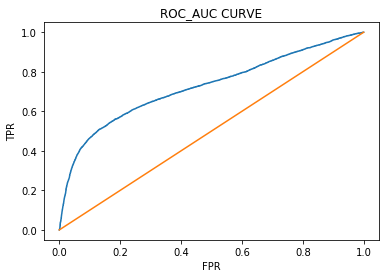

In [0]:
fpr,tpr,thresholds=roc_curve(y,y_prob)
print(fpr,tpr)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC CURVE")

In [0]:
print(confusion_matrix(y,y_pred))

## **LOGISTIC REGRESSION- ML APPROACH**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve
lr=LogisticRegression(solver="liblinear")

In [0]:
data=pd.read_csv("/content/drive/My Drive/casestudy datasets/credit-card-default.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaulted
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [0]:
data=data.drop(["ID"],axis=1)
cat_cols=["SEX","EDUCATION","MARRIAGE"]
data=pd.get_dummies(data,columns=cat_cols,drop_first=True)

In [0]:
y=data["defaulted"]
X=data.drop(["defaulted"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [0]:
lr.fit(X_train,y_train)
y_train_pred=lr.predict(X_train) #ML
y_train_prob=lr.predict_proba(X_train)[:,1] #  in statistics
print(confusion_matrix(y_train,y_train_pred))
print("auc score of train data",roc_auc_score(y_train,y_train_prob))

[[16322     2]
 [ 4676     0]]
auc score of train data 0.6461101845037478


In [0]:
y_train_prob

array([0.18936502, 0.3184937 , 0.33281776, ..., 0.35003182, 0.31862127,
       0.21531645])

Text(0.5, 1.0, 'ROC_AUC CURVE')

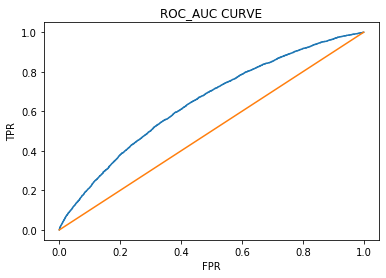

In [0]:
fpr,tpr,thresholds=roc_curve(y_train,y_train_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC CURVE")

In [0]:
y_test_pred=lr.predict(X_test) #ML
y_test_prob=lr.predict_proba(X_test)[:,1] #  in statistics
print(confusion_matrix(y_test,y_test_pred))
print("auc score of test data",roc_auc_score(y_test,y_test_prob))

[[7040    0]
 [1960    0]]
auc score of test data 0.6479802006029685


Text(0.5, 1.0, 'ROC_AUC CURVE')

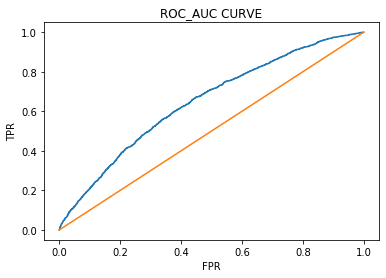

In [0]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC CURVE")

## **RANDOM FOREST**

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=10)
rf.fit(X_train,y_train)
y_train_pred=rf.predict(X_train)
y_train_prob=rf.predict_proba(X_train)[:,1]
print(confusion_matrix(y_train,y_train_pred))
print("auc score of train data",roc_auc_score(y_train,y_train_prob))

[[16301    23]
 [  386  4290]]
auc score of train data 0.9991449348301681


Text(0.5, 1.0, 'ROC_AUC CURVE')

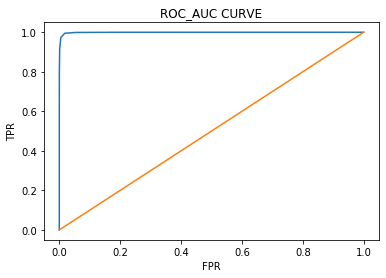

In [0]:
fpr,tpr,thresholds=roc_curve(y_train,y_train_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC CURVE")

In [0]:
y_test_pred=rf.predict(X_test) #ML
y_test_prob=rf.predict_proba(X_test)[:,1] #  in statistics
print(confusion_matrix(y_test,y_test_pred))
print("auc score of test data",roc_auc_score(y_test,y_test_prob))

[[6611  429]
 [1332  628]]
auc score of test data 0.7222839242230983


Text(0.5, 1.0, 'ROC_AUC CURVE')

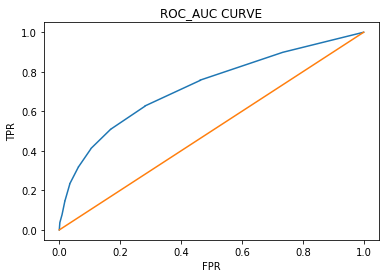

In [0]:
p;21152fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC CURVE")

### **HYPER PARAMETER TUNING - RANDOM FOREST**

In [0]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [0]:
rf=RandomForestClassifier()


param_grid = {"max_depth":[4,8,10],"min_samples_leaf":range(100,400,20),"min_samples_split":range(10,100,20),"n_estimators":[100,200,300,400]}

#grid = GridSearchCV(estimator=rf,cv=3,
                    #param_grid=param_grid,
                    #scoring='roc_auc')
#grid.fit(X,y)

In [0]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

NameError: ignored

In [0]:
random = RandomizedSearchCV(estimator=rf,
                            param_distributions=param_grid,
                            scoring='roc_auc',
                            cv=3)
random_result = random.fit(X, y)

print('Best Score: ', random_result.best_score_)
print('Best Params: ', random_result.best_params_)

Best Score:  0.7796954395457935
Best Params:  {'n_estimators': 200, 'min_samples_split': 50, 'min_samples_leaf': 120, 'max_depth': 10}


In [0]:
rf=RandomForestClassifier(**random_result.best_params_)


In [0]:
rf.fit(X_train,y_train)
y_train_pred=rf.predict(X_train)
y_train_prob=rf.predict_proba(X_train)[:,1]
print(confusion_matrix(y_train,y_train_pred))
print("auc score of train data",roc_auc_score(y_train,y_train_prob))

[[15641   683]
 [ 3097  1579]]
auc score of train data 0.803278434991256


Text(0.5, 1.0, 'ROC_AUC CURVE')

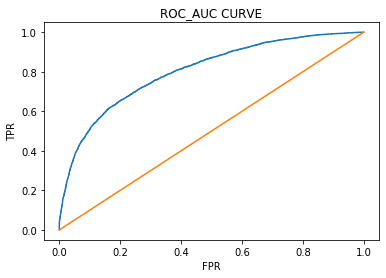

In [0]:
fpr,tpr,thresholds=roc_curve(y_train,y_train_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC CURVE")

In [0]:
y_test_pred=rf.predict(X_test) #ML
y_test_prob=rf.predict_proba(X_test)[:,1] #  in statistics
print(confusion_matrix(y_test,y_test_pred))
print("auc score of test data",roc_auc_score(y_test,y_test_prob))

[[6740  300]
 [1344  616]]
auc score of test data 0.7750199298469388


Text(0.5, 1.0, 'ROC_AUC CURVE')

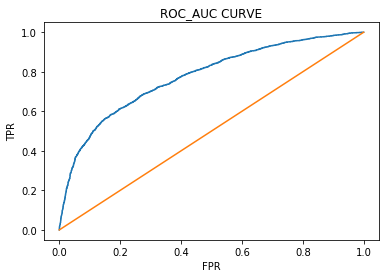

In [0]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC CURVE")

### **LIGHT GBM**-boosting technique

In [0]:
import lightgbm as lgb

In [0]:
l_train=lgb.Dataset(X_train, label=y_train)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['max_depth'] = 10
clf = lgb.train(params, l_train)

In [0]:
#Prediction
y_train_prob=clf.predict(X_train)
y_train_pred=pd.Series(y_test_prob).apply(lambda x:1 if x>0.5 else 0)

#convert into binary values
#for i in range(0,99):
#    if y_train_pred[i]>=.5:       # setting threshold to .5
#       y_train_pred[i]=1
#    else:  
#       y_train_pred[i]=0

In [0]:
y_train_pred

In [0]:
print("auc score of train data",roc_auc_score(y_train,y_train_prob))

In [0]:
fpr,tpr,thresholds=roc_curve(y_train,y_train_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC CURVE")

In [0]:
print(confusion_matrix(y_test,y_test_pred))
print("auc score of test data",roc_auc_score(y_test,y_test_prob))

In [0]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC CURVE")

In [0]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
fig,ax1=plt.subplots()
ax1.plot(fpr,tpr)
ax2=ax1.twinx()  # creating a two axis with its own scale
ax2.plot(fpr,thresholds)


LGBM-HYPERPARAMETER TUNING

In [0]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

param_test ={"num_leaves": sp_randint(6,50),"min_child_samples":sp_randint(100,500),
             "reg_alpha":[0,0.1,1,2,5,7,50,100]}
clf=lgb.LGBMClassifier(random_state=42)
# Initialize a RandomizedSearchCV object using 5-fold CV-
rs_cv = RandomizedSearchCV(estimator=clf, param_distributions=param_test, cv = 3,random_state=42)

# Train on training data-
rs_cv.fit(X, y)

In [0]:
print('Best Score: ', rs_cv.best_score_)
print('Best Params: ', rs_cv.best_params_)

In [0]:
clf=lgb.LGBMClassifier(**rs_cv.best_params_)

In [0]:
l_train=lgb.Dataset(X_train, label=y_train)
clf.fit(X_train, y_train)

In [0]:
#Prediction
y_train_pred=clf.predict(X_train)
y_train_prob=clf.predict_proba(X_train)[:,1]
#y_train_pred=pd.Series(y_test_prob).apply(lambda x:1 if x>0.5 else 0)

#convert into binary values
#for i in range(0,99):
#    if y_train_pred[i]>=.5:       # setting threshold to .5
#       y_train_pred[i]=1
#    else:  
#       y_train_pred[i]=0

In [0]:
y_train_prob

In [0]:
print("auc score of train data",roc_auc_score(y_train,y_train_prob))

In [0]:
fpr,tpr,thresholds=roc_curve(y_train,y_train_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC CURVE")

In [0]:
print(confusion_matrix(y_test,y_test_pred))
print("auc score of test data",roc_auc_score(y_test,y_test_prob))

In [0]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC CURVE")

## **SVM**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve
lr=LogisticRegression(solver="liblinear")

In [0]:
data=pd.read_csv("/content/drive/My Drive/casestudy datasets/credit-card-default.csv")
data.head()

In [0]:
data=data.drop(["ID"],axis=1)
cat_cols=["SEX","EDUCATION","MARRIAGE"]
data=pd.get_dummies(data,columns=cat_cols,drop_first=True)

In [0]:
y=data["defaulted"]
X=data.drop(["defaulted"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [0]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

In [0]:
svc = svm.SVC(gamma="auto",probability=True)
svc.fit(X_train, y_train)

In [0]:
y_train_pred=svc.predict(X_train)
y_train_prob=svc.predict_proba(X_train)[:,1]
print(confusion_matrix(y_train,y_train_pred))
print("auc score of train data",roc_auc_score(y_train,y_train_prob))

In [0]:
fpr,tpr,thresholds=roc_curve(y_train,y_train_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC CURVE")

In [0]:
y_test_pred=svc.predict(X_test) #ML
y_test_prob=svc.predict_proba(X_test)[:,1] #  in statistics
print(confusion_matrix(y_test,y_test_pred))
print("auc score of test data",roc_auc_score(y_test,y_test_prob))

In [0]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC CURVE")

### **SVM-HYPERPARAMETER TUNING**

In [0]:
Cs=[0.01,0.1,1,10]
gammas=[0.001,0.01,0.1]
param_grid={"C":Cs,"gamma":gammas}
svc=svm.SVC()
rs=RandomizedSearchCV(svc,param_distributions=param_grid,cv=3)
rs.fit(X,y)

In [0]:
svc = svm.SVC(**rs.best_params_,probability=True)
svc.fit(X_train, y_train)

In [0]:
y_train_pred=svc.predict(X_train)
y_train_prob=svc.predict_proba(X_train)[:,1]
print(confusion_matrix(y_train,y_train_pred))
print("auc score of train data",roc_auc_score(y_train,y_train_prob))

In [0]:

fpr,tpr,thresholds=roc_curve(y_train,y_train_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC CURVE")

In [0]:
y_test_pred=svc.predict(X_test) #ML
y_test_prob=svc.predict_proba(X_test)[:,1] #  in statistics
print(confusion_matrix(y_test,y_test_pred))
print("auc score of test data",roc_auc_score(y_test,y_test_prob))

In [0]:
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC_AUC CURVE")